In [45]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
# ignores FutureWarnings. Helps in readbility.
# Since we are using a conda envrionment with defined package versions we are not concerned with changes in a package's future releases.


In [47]:
datadir = "data"
savedir = "plots"

if not os.path.exists(savedir):
    os.mkdir(savedir)

In [48]:
sns.set(style="whitegrid", font_scale=1.2)

## 2A

In [49]:
df_music = pd.read_table(os.path.join(datadir, "MuSiC_ica.txt"), index_col=0).T
df_music = df_music[["rmse_orig", "rmse_ica", "rmse_m"]]

In [50]:
df_music.rename(columns={"rmse_orig": "MuSiC",
                        "rmse_ica": "MuSiC (ICA)",
                         "rmse_m": "MuSiC-M",
                        }, inplace=True)

In [52]:
df_music["MuSiC-M"]-df_music["MuSiC"]

SDY67       -0.024505
Monaco I    -0.046327
Monaco II    0.018142
GSE65133     0.007796
GSE107572    0.024311
GSE120502   -0.037709
dtype: float64

In [41]:
df_music["dataset"] = df_music.index.tolist() 

In [42]:
df_music = df_music.melt(id_vars=["dataset"])
df_music.rename(columns={"variable": "Method", "value": "rmse"},
         inplace=True)

In [43]:
order = ["MuSiC", "MuSiC-M", "MuSiC (ICA)"]

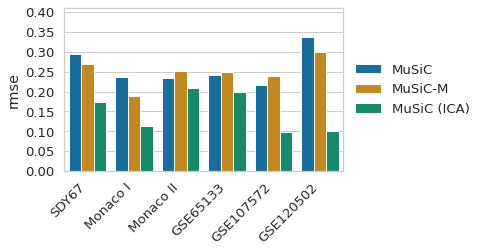

In [27]:
plt.figure(figsize=(5,3))
sns.barplot(data=df_music, hue="Method", x="dataset", y="rmse",
           palette="colorblind", ci=None, hue_order=order)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.ylabel(r"$r$")
plt.ylabel("rmse")
plt.ylim(0,0.41)
plt.yticks(np.arange(0,0.41,0.05))
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(savedir, "S2A_average_rmse_music.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "S2A_average_rmse_music.png"), transparent=False, bbox_inches="tight", dpi=300)

## 2B

In [53]:
df_music = pd.read_table(os.path.join(datadir, "MuSiC_ica.txt"), index_col=0).T
df_music = df_music[["r_orig", "r_ica", "r_m"]]

In [54]:
df_music.rename(columns={"r_orig": "MuSiC",
                         "r_ica": "MuSiC (ICA)",
                         "r_m": "MuSiC-M",}, inplace=True)

In [57]:
df_music["MuSiC-M"]-df_music["MuSiC"]

SDY67        0.111817
Monaco I     0.012809
Monaco II   -0.022584
GSE65133     0.036600
GSE107572   -0.015512
GSE120502    0.160491
dtype: float64

In [31]:
order

['MuSiC', 'MuSiC-M', 'MuSiC (ICA)']

In [32]:
df_music["dataset"] = df_music.index.tolist() 

In [33]:
df_music = df_music.melt(id_vars=["dataset"])
df_music.rename(columns={"variable": "Method", "value": "r"},
         inplace=True)

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=df_music, hue="Method", x="dataset", y="r",
           palette="colorblind", ci=None, hue_order=order)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.ylabel(r"$r$")
plt.ylabel("r")
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(savedir, "S2B_average_r_music.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "S2B_average_r_music.png"), transparent=False, bbox_inches="tight", dpi=300)